In [122]:
################ Data Analysis & Calculation ##############3
import numpy as np 
import pandas as pd 

############ Data Visualization ##############
import matplotlib.pyplot as plt
%matplotlib inline

############### NLP & Search pattern ##################
import re  
import nltk 

############### Ignore Warning #############3
import warnings
warnings.filterwarnings('ignore')

In [124]:
apple = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\NLP\apple.csv", encoding='latin1')
apple.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,RT @option_snipper: $AAPL beat on both eps and...,False,0,NaN,2017-08-01 20:31:56,False,NaN,892483055922724864,NaN,"<a href=""http://twitter.com/download/iphone"" r...",KnowledgeMC,3,True,False,NaN,NaN
1,RT @option_snipper: $AAPL beat on both eps and...,False,0,NaN,2017-08-01 20:31:55,False,NaN,892483051925778434,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Migcortina,3,True,False,NaN,NaN
2,Let's see this break all timers. $AAPL 156.89,False,0,NaN,2017-08-01 20:31:55,False,NaN,892483050885582850,NaN,"<a href=""http://stocktwits.com"" rel=""nofollow""...",beckyhiu,0,False,False,NaN,NaN
3,RT @SylvaCap: Things might get ugly for $aapl ...,False,0,NaN,2017-08-01 20:31:55,False,NaN,892483049040097280,NaN,"<a href=""http://twitter.com/download/android"" ...",MarveiTheBoxer,85,True,False,NaN,NaN
4,$AAPL - wow! This was supposed to be a throw-a...,False,0,NaN,2017-08-01 20:31:54,False,NaN,892483047530090496,NaN,"<a href=""http://stocktwits.com"" rel=""nofollow""...",LU_Rambler12,0,False,False,NaN,NaN


# WordCloud

In [17]:
data=pd.DataFrame(apple.text)
data.head()

,text
0,RT @option_snipper: $AAPL beat on both eps and...
1,RT @option_snipper: $AAPL beat on both eps and...
2,Let's see this break all timers. $AAPL 156.89
3,RT @SylvaCap: Things might get ugly for $aapl ...
4,$AAPL - wow! This was supposed to be a throw-a...


In [22]:
data.iloc[1,0]

'RT @option_snipper: $AAPL beat on both eps and revenues. SEES 4Q REV. $49B-$52B, EST. $49.1B https://t.co/hfHXqj0IOB'

In [24]:
data.text=data.text.str.lower()

In [26]:
data['text'] = data['text'].replace(r'http\S+|www\S+', '', regex=True)
data.iloc[1,0]

'rt @option_snipper: $aapl beat on both eps and revenues. sees 4q rev. $49b-$52b, est. $49.1b '

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [36]:
data.text = data.text.apply(lambda x : remove_punctuation(x)) # Text = x

In [38]:
data.iloc[1,0]

'rt optionsnipper aapl beat on both eps and revenues sees 4q rev 49b52b est 491b '

In [40]:
data['text'] = data['text'].replace(r'\d+', '', regex=True)

In [42]:
data.iloc[1,0]

'rt optionsnipper aapl beat on both eps and revenues sees q rev bb est b '

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('English')

print("No.of StopWords :",len(stop))
stop

No.of StopWords : 179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
data.text = data.text.apply(lambda x: ' '.join([c      
                                                      for c in x.split() 
                                                      if c not in (stop)]))

In [52]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

In [58]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") 
            for w in w_tokenizer.tokenize(abc)]  

In [60]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))  
data.iloc[991,0]

'million subscribers spotifys still twice big apple music aapl p'

In [68]:
data.text = data.text.str.rstrip()

In [70]:
data = data.drop_duplicates()
data.shape

(595, 1)

In [74]:
data.head()

,text
0,rt optionsnipper aapl beat eps revenues see q ...
2,let see break timers aapl
3,rt sylvacap things might get ugly aapl iphone ...
4,aapl wow suppose throwaway quarter aapl beat m...
5,rt cnbcnow earn apple q eps vs est q rev b vs ...


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') 
data_cv = cv.fit_transform(data.text)  
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) 
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,585,586,587,588,589,590,591,592,593,594
aaoi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aapl,1,1,2,2,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,2,1
aaplbeatson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaplgtrevisiontrends,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aapls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
½í,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
½í²,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
½í³,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
½íº,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,586,587,588,589,590,591,592,593,594,freq
aaoi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aapl,1,1,2,2,1,1,1,1,1,1,...,0,1,1,1,1,1,1,2,1,593
aaplbeatson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaplgtrevisiontrends,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aapls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,586,587,588,589,590,591,592,593,594,freq
0,aaoi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,aapl,1,1,2,2,1,1,1,1,1,...,0,1,1,1,1,1,1,2,1,593
2,aaplbeatson,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aaplgtrevisiontrends,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,aapls,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
1,aapl,593
366,earn,239
59,apple,119
1076,rt,112
1034,report,45
...,...,...
650,iphonex,1
651,iphoneâ,1
653,ir,1
654,ish,1


In [86]:
w = tdm1[tdm1['freq']>20]
w

,Word,freq
1,aapl,593
366,earn,239
59,apple,119
1076,rt,112
1034,report,45
648,iphone,41
1302,trade,40
1190,stock,38
42,amp,35
1378,vs,33


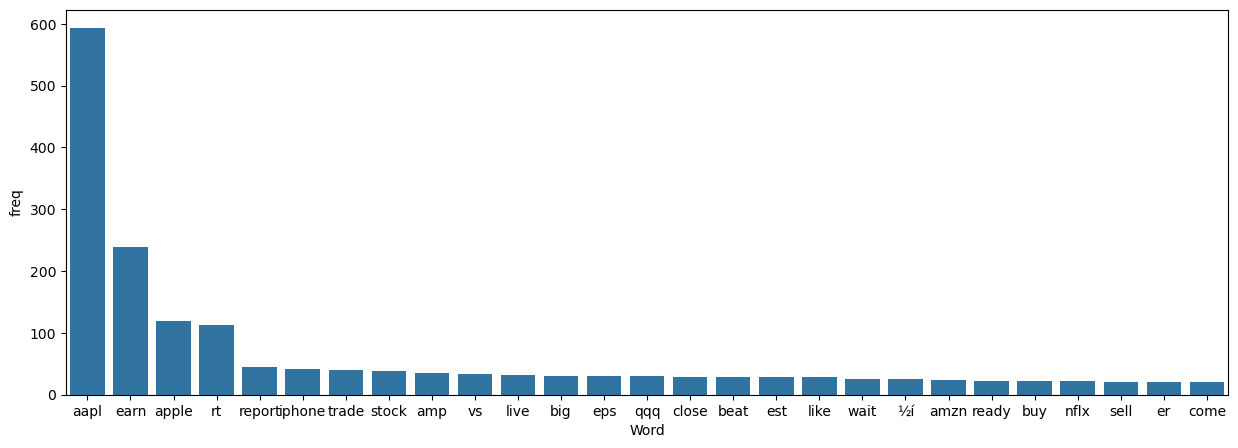

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
fg = sns.barplot(x='Word', y='freq',data=w)

In [90]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 33456 words in the combination of all review.


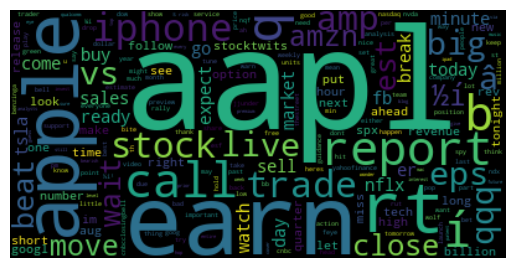

In [94]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

abc = WordCloud(stopwords=stopwords,
                      background_color="black",
                      collocations=False,
                      mode="RGBA",  # r = red , g = green , b = blue
                      max_words=33456).generate(text)

plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

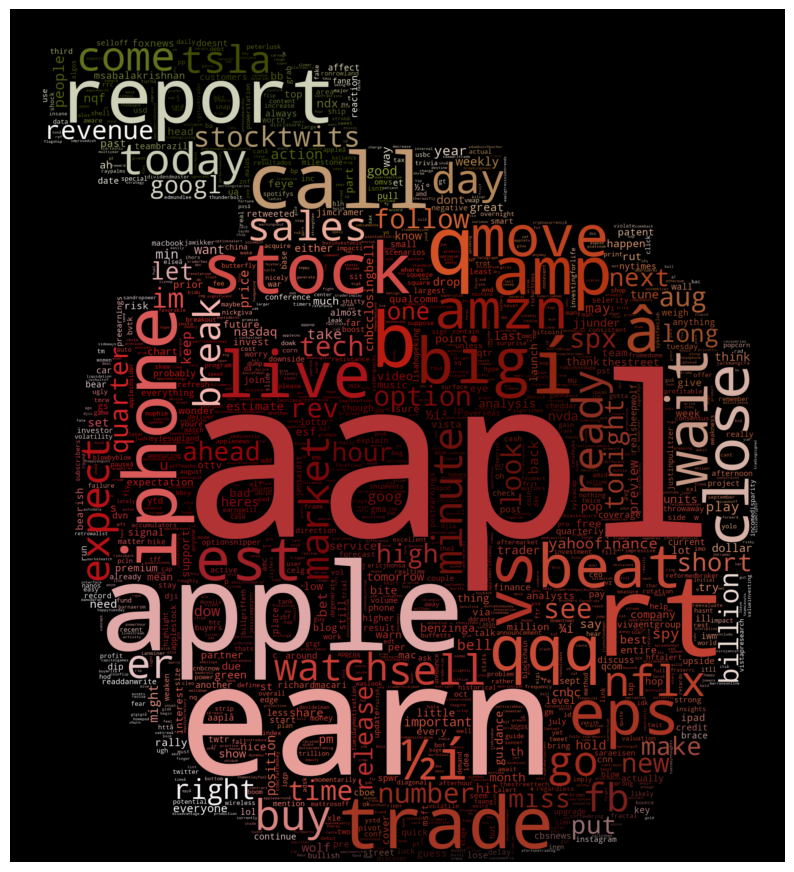

In [98]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\NLP\apple png 1.png")) # shape & colour
abc = WordCloud(stopwords=stopwords,
                           background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=15000, 
                           mask=mask,  ### shape of leaf
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour OF leaf
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

In [101]:
data.head(10)

,text
0,rt optionsnipper aapl beat eps revenues see q ...
2,let see break timers aapl
3,rt sylvacap things might get ugly aapl iphone ...
4,aapl wow suppose throwaway quarter aapl beat m...
5,rt cnbcnow earn apple q eps vs est q rev b vs ...
7,rt selerity break apple aapl q earn per share ...
8,rt selerity break apple aapl q revenue b vs b ...
9,rt jackwangcfa apple apple aapl earn realtime ...
10,rt selerity break apple aapl q iphone shipment...
11,aapl probably tank tomorrow lol


In [103]:
from textblob import TextBlob

data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity) 
data.head(5)

,text,polarity
0,rt optionsnipper aapl beat eps revenues see q ...,0.00000
2,let see break timers aapl,0.00000
3,rt sylvacap things might get ugly aapl iphone ...,-0.50625
4,aapl wow suppose throwaway quarter aapl beat m...,0.10000
5,rt cnbcnow earn apple q eps vs est q rev b vs ...,0.00000


In [105]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,rt optionsnipper aapl beat eps revenues see q ...,0.00000,Positive
2,let see break timers aapl,0.00000,Positive
3,rt sylvacap things might get ugly aapl iphone ...,-0.50625,Negative
4,aapl wow suppose throwaway quarter aapl beat m...,0.10000,Positive
5,rt cnbcnow earn apple q eps vs est q rev b vs ...,0.00000,Positive


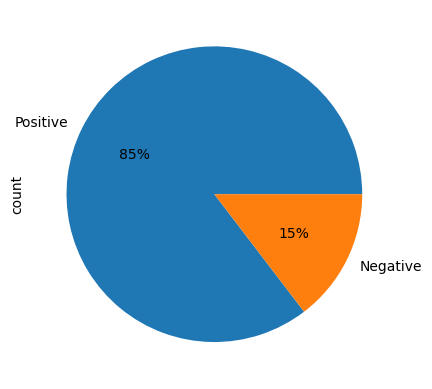

In [107]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");

# Machine Learning

In [148]:
data_dtm.head()

,aaoi,aapl,aaplbeatson,aaplgtrevisiontrends,aapls,aaplshorts,aaplâ,accord,accumulators,acquire,...,zbf,zenith,znf,zometeen,¼í¾,½í,½í²,½í³,½íº,¾í
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
data_dtm['Sentiment'] = data.Sentiment
data_dtm.head()

,aaoi,aapl,aaplbeatson,aaplgtrevisiontrends,aapls,aaplshorts,aaplâ,accord,accumulators,acquire,...,zenith,znf,zometeen,¼í¾,½í,½í²,½í³,½íº,¾í,Sentiment
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [188]:
data_dtm.isnull().sum()

aaoi                      0
aapl                      0
aaplbeatson               0
aaplgtrevisiontrends      0
aapls                     0
                       ... 
½í²                       0
½í³                       0
½íº                       0
¾í                        0
Sentiment               249
Length: 1462, dtype: int64

In [204]:
df=data_dtm.dropna()

In [284]:
df.isnull().sum()

aaoi                    0
aapl                    0
aaplbeatson             0
aaplgtrevisiontrends    0
aapls                   0
                       ..
½í²                     0
½í³                     0
½íº                     0
¾í                      0
Sentiment               0
Length: 1462, dtype: int64

<Axes: >

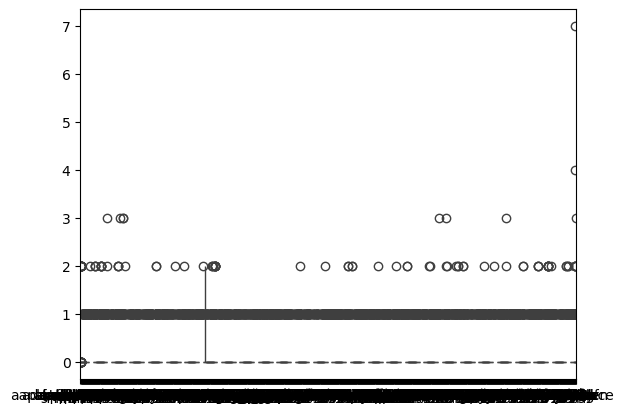

In [361]:
import seaborn as sns
sns.boxplot(data=df)

In [363]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

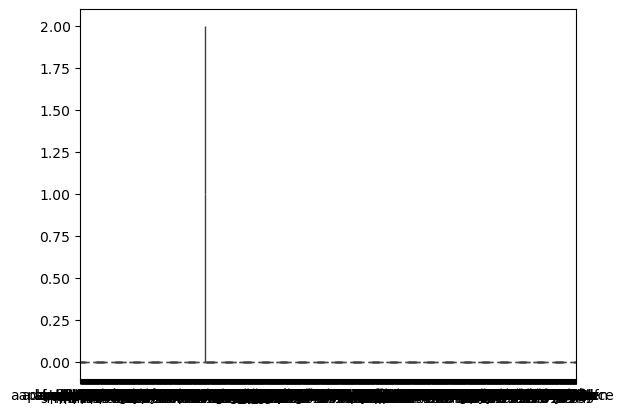

In [365]:
import seaborn as sns
sns.boxplot(data = df)

In [367]:
from sklearn.model_selection import train_test_split

x = df.drop(['Sentiment'],axis=1)
y = df['Sentiment']

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

In [369]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                 min_samples_leaf=4, ## child
                                 min_samples_split=10, #parent 
                                 max_depth=4)  #branches)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10)

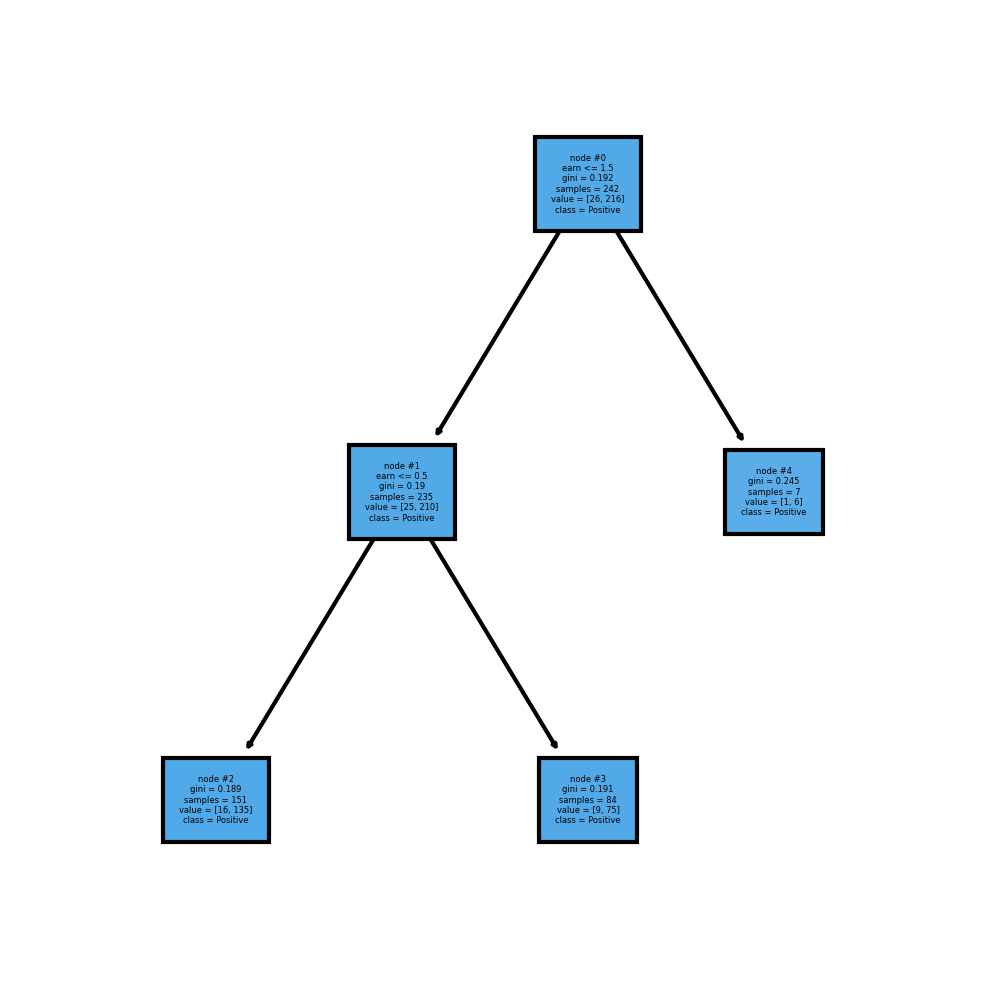

In [373]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier,
               feature_names = cv.get_feature_names_out(), 
               class_names=['Negative', 'Positive'],
               filled = True,
              node_ids=True,
              fontsize=2);
#fig.savefig('imagename.png')

In [375]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,aaoi,aapl,aaplbeatson,aaplgtrevisiontrends,aapls,aaplshorts,aaplâ,accord,accumulators,acquire,...,zenith,znf,zometeen,¼í¾,½í,½í²,½í³,½íº,¾í,Sentiment
509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
539,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
443,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
256,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [377]:
train['Predicted'] = classifier.predict(X_train)
train.head()

,aaoi,aapl,aaplbeatson,aaplgtrevisiontrends,aapls,aaplshorts,aaplâ,accord,accumulators,acquire,...,znf,zometeen,¼í¾,½í,½í²,½í³,½íº,¾í,Sentiment,Predicted
509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
539,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
443,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
256,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
